<a href="https://colab.research.google.com/github/kylemccullough1/MachineLearning/blob/main/Assignment_4_Problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import math
import pandas as pd
from sklearn.metrics import accuracy_score
from operator import itemgetter
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Load all the data
dataset = pd.ExcelFile("/content/drive/MyDrive/Assignment_4/Asssignment4_Data.xlsx")
# I renamed the sheets to be Train and Test
train_data = pd.read_excel(dataset, 'Train')
test_data = pd.read_excel(dataset, 'Test')
train_data, test_data = train_data.drop(columns=['House ID']), test_data.drop(columns=['House ID'])
test_data

,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
0,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
1,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
2,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
3,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
4,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [25]:
X_train = train_data.drop([train_data.columns[-1]], axis = 1)
y_train = train_data[train_data.columns[-1]]
X_test = test_data.drop([test_data.columns[-1]], axis = 1)
y_test = test_data[test_data.columns[-1]]

In [14]:
def euclidean_distance(point1, point2):
	distance = 0.0
	for i in range(len(point1)-1):
		distance += (point1[i] - point2[i])**2
	return math.sqrt(distance)

In [16]:
def get_neighbors(points, point2, num_neighbors):
	distances = []
	for point1 in points:
		dist = euclidean_distance(point1, point2)
		distances.append((point1, dist))
	distances.sort(key=itemgetter(1))
	neighbors = []
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [36]:
def prediction(neighbors, points, y):
  apartment = 0
  condo = 0
  house = 0
  for i in range(len(neighbors)):
    # print(y[points.index(neighbors[i])])
    if(y[points.index(neighbors[i])] == 'Apartment'):
       apartment += 1
    elif(y[points.index(neighbors[i])] == 'Condo'):
      condo += 1
    else:
      house += 1
  if(apartment >= condo and apartment >= house):
    return 'Apartment'
  elif(condo >= apartment and condo >= house):
    return 'Condo'
  else:
    return 'House'

In [38]:
def k_nearest(k, points, y):
  predictions = []
  for i in range(len(points)):
    neighbors = get_neighbors(points, points[i], k)
    predictions.append(prediction(neighbors, points, y))
  return predictions

<function matplotlib.pyplot.show(*args, **kw)>

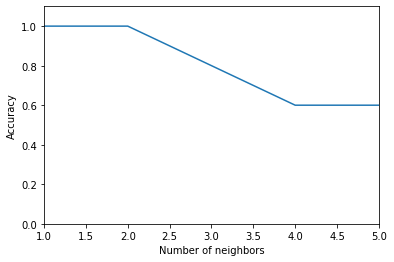

In [68]:
features_test=list(zip(X_test['Local Price'], X_test['Bathrooms'], X_test['Land Area'], X_test['Living area'], X_test['# Garages'], X_test['# Rooms'], X_test['# Bedrooms'], X_test['Age of home']))

accuracy = []
for i in range(5):
  i = i + 1
  predictions = k_nearest(i, features_test, y_test)
  accuracy.append(accuracy_score(predictions, y_test))

plt.plot([1,2,3,4,5], accuracy)
plt.axis([1, 5, 0, 1.1])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show
# I believe the reason the accuracy is really weird is because of a lack of data in the test set. The test set does not even include an example of condo, and
# by the time it has 5 neighbors, it is basically just saying everything is Apartment because in the test set, the majority vote would be Apartment.